In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.max_columns',None)

In [6]:
train = pd.read_csv('Training_cleaned_shubham.csv')
target = '35'
IDcol = 'application_key'

In [7]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4



def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.809
AUC Score (Train): 0.835943
CV Score : Mean - 0.8311313 | Std - 0.008731986 | Min - 0.8188073 | Max - 0.8432097


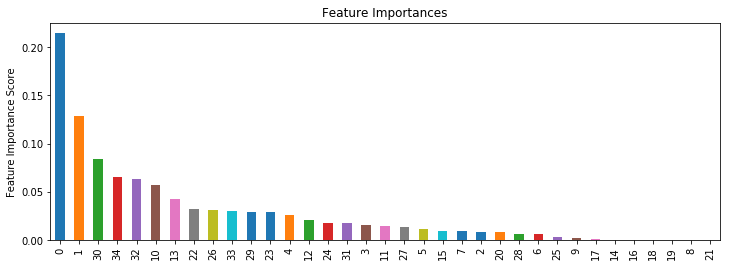

In [8]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

In [9]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {"n_estimators":[80,90,100,110,120,130,140,150,160,170]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [80, 90, 100, 110, 120, 130, 140, 150, 160, 170]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

# optimal value  n_estimate 80

In [10]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.83250, std: 0.00866, params: {'n_estimators': 80},
  mean: 0.83245, std: 0.00868, params: {'n_estimators': 90},
  mean: 0.83227, std: 0.00863, params: {'n_estimators': 100},
  mean: 0.83225, std: 0.00863, params: {'n_estimators': 110},
  mean: 0.83213, std: 0.00867, params: {'n_estimators': 120},
  mean: 0.83200, std: 0.00875, params: {'n_estimators': 130},
  mean: 0.83197, std: 0.00877, params: {'n_estimators': 140},
  mean: 0.83179, std: 0.00877, params: {'n_estimators': 150},
  mean: 0.83162, std: 0.00879, params: {'n_estimators': 160},
  mean: 0.83139, std: 0.00885, params: {'n_estimators': 170}],
 {'n_estimators': 80},
 0.8325009945094394)

# 7, 'min_samples_split': 1400

In [12]:
param_test2 = {'max_depth':[5,7,9,11,13,15,17,19], 'min_samples_split':[200,400,600,800,1000,1200,1400,1600]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.83141, std: 0.00867, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.83151, std: 0.00919, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.83153, std: 0.00899, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.83119, std: 0.00912, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.83107, std: 0.00910, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.83139, std: 0.00868, params: {'max_depth': 5, 'min_samples_split': 1200},
  mean: 0.83150, std: 0.00823, params: {'max_depth': 5, 'min_samples_split': 1400},
  mean: 0.83153, std: 0.00841, params: {'max_depth': 5, 'min_samples_split': 1600},
  mean: 0.83039, std: 0.00870, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.83117, std: 0.00861, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.83180, std: 0.00830, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.83148, std: 0.00823, params: {'max_depth': 7, 'min_samples_split': 800},


# Min sample split 1400 and min sample leaf 80

In [13]:
param_test3 = {'min_samples_split':[1000,1200,1400,1600,1800,2000,2200,2400], 'min_samples_leaf':[30,40,50,60,70,80]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83155, std: 0.00832, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.83192, std: 0.00850, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.83198, std: 0.00838, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.83205, std: 0.00819, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.83189, std: 0.00855, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.83134, std: 0.00851, params: {'min_samples_leaf': 30, 'min_samples_split': 2000},
  mean: 0.83181, std: 0.00892, params: {'min_samples_leaf': 30, 'min_samples_split': 2200},
  mean: 0.83162, std: 0.00861, params: {'min_samples_leaf': 30, 'min_samples_split': 2400},
  mean: 0.83215, std: 0.00863, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.83216, std: 0.00851, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.83207, std: 0.00840, params: {'min_samples_leaf': 40, 'min_samples_spl


Model Report
Accuracy : 0.8154
AUC Score (Train): 0.845195
CV Score : Mean - 0.8322881 | Std - 0.008245004 | Min - 0.8205277 | Max - 0.8440186


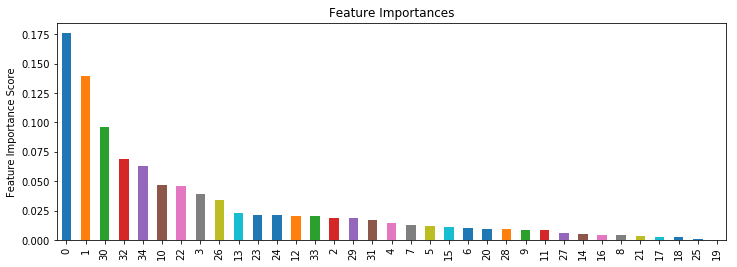

In [14]:
modelfit(gsearch3.best_estimator_, train, predictors)

# max feature 17 

In [ ]:
13,23,24,,12,33,2,29,31

In [17]:
param_test4 = {'max_features':[7,9,11,13,15,17,19,21,23,25]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80,max_depth=7, min_samples_split=1400, min_samples_leaf=80, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.83112, std: 0.00841, params: {'max_features': 7},
  mean: 0.83060, std: 0.00846, params: {'max_features': 9},
  mean: 0.83108, std: 0.00845, params: {'max_features': 11},
  mean: 0.83088, std: 0.00809, params: {'max_features': 13},
  mean: 0.83112, std: 0.00845, params: {'max_features': 15},
  mean: 0.83129, std: 0.00840, params: {'max_features': 17},
  mean: 0.83051, std: 0.00821, params: {'max_features': 19},
  mean: 0.83100, std: 0.00836, params: {'max_features': 21},
  mean: 0.83081, std: 0.00827, params: {'max_features': 23},
  mean: 0.83081, std: 0.00785, params: {'max_features': 25}],
 {'max_features': 17},
 0.8312912120669708)


Model Report
Accuracy : 0.8205
AUC Score (Train): 0.854282
CV Score : Mean - 0.8312912 | Std - 0.008400925 | Min - 0.8194262 | Max - 0.8432466


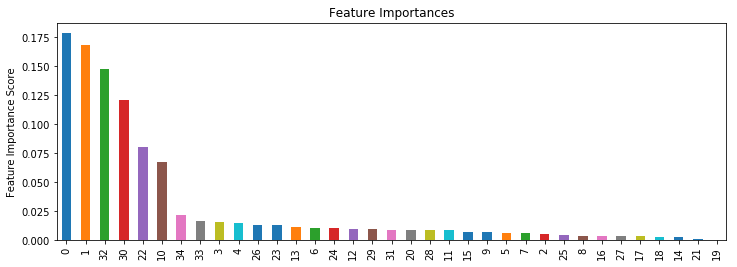

In [19]:
modelfit(gsearch4.best_estimator_, train, predictors)

# subsample value .75

In [20]:
param_test5 = {'subsample':[0.5,0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, n_estimators=80,max_depth=7,min_samples_split=1400, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=17),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.83183, std: 0.00840, params: {'subsample': 0.5},
  mean: 0.83170, std: 0.00831, params: {'subsample': 0.6},
  mean: 0.83191, std: 0.00812, params: {'subsample': 0.7},
  mean: 0.83213, std: 0.00829, params: {'subsample': 0.75},
  mean: 0.83179, std: 0.00829, params: {'subsample': 0.8},
  mean: 0.83196, std: 0.00838, params: {'subsample': 0.85},
  mean: 0.83166, std: 0.00811, params: {'subsample': 0.9}],
 {'subsample': 0.75},
 0.8321250239177242)

In [21]:
# lead_df=pd.read_csv('lead_cleaned_shubham.csv',index_col='application_key')
# # lead_df.columns=colm[:-1]
# # lead_df=(lead_df-lead_df.mean(axis=0))/lead_df.std(axis=0)
# # lead_df=lead_df[imp_col[:-1]]
# # lead_df=Pca(lead_df)
# print(len(predictors),lead_df.shape, 'gbm ')


# lead_pred=gsearch5.predict(lead_df)
# proba=gsearch5.predict_proba(lead_df)
# lead_df['pridicted']=lead_pred
# lead_df['prob']=proba[:,0]
# lead_df=lead_df.sort_values(by=['prob'],ascending=False)
# result=lead_df['pridicted'].astype(int)
# result.to_csv('Datadevils_IITGuwahati_173.csv')

35 (25000, 35) gbm 
